# Import libraries

In [1]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sb
import pandas as pd
import numpy as np

# Load data from .csv or .xlsx files

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data

,Attractive Level,Sound,Music,Noise control,Speaking Style,Camera,Stable,Angel diversity,Images,Resolution,Color,Content,Introduction,Food description,Reviewer,Reviewer emotion,Recommendation,Clear information
0,3,4,4,3,4,4,4,1,5,4,5,4,1,1,3,2,0,1
1,2,3,3,1,3,3,2,1,3,3,3,3,1,1,3,3,1,1
2,4,4,4,2,3,4,4,1,4,5,4,4,1,1,4,3,1,1
3,2,2,2,1,3,3,4,1,2,4,1,3,1,0,2,2,0,1
4,2,3,3,2,3,3,4,0,3,4,2,3,1,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,4,4,3,3,4,4,3,1,4,4,4,4,1,1,4,3,1,1
131,3,3,3,3,3,3,4,1,3,4,3,3,1,1,3,2,0,1
132,4,4,4,2,4,4,4,1,4,4,4,4,1,1,4,3,1,1
133,2,3,3,3,3,3,3,1,4,4,4,2,1,1,4,2,0,1


# Dataset (features and labels)

In [4]:
features = data.loc[:, data.columns != "Attractive Level"].values
labels = data.loc[:, data.columns == "Attractive Level"].values

In [5]:
features

array([[4, 4, 3, ..., 2, 0, 1],
       [3, 3, 1, ..., 3, 1, 1],
       [4, 4, 2, ..., 3, 1, 1],
       ...,
       [4, 4, 2, ..., 3, 1, 1],
       [3, 3, 3, ..., 2, 0, 1],
       [5, 5, 4, ..., 3, 1, 1]])

In [6]:
labels

array([[3],
       [2],
       [4],
       [2],
       [2],
       [3],
       [4],
       [3],
       [4],
       [2],
       [4],
       [3],
       [4],
       [3],
       [4],
       [2],
       [5],
       [4],
       [4],
       [4],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [4],
       [2],
       [2],
       [3],
       [4],
       [4],
       [2],
       [2],
       [2],
       [5],
       [3],
       [5],
       [3],
       [3],
       [3],
       [2],
       [2],
       [3],
       [4],
       [1],
       [4],
       [3],
       [2],
       [2],
       [3],
       [4],
       [2],
       [3],
       [4],
       [2],
       [5],
       [4],
       [5],
       [3],
       [4],
       [3],
       [2],
       [4],
       [4],
       [3],
       [2],
       [3],
       [3],
       [3],
       [4],
       [5],
       [3],
       [4],
       [3],
       [4],
       [3],
       [3],
       [4],
    

# Correlation Coefficient

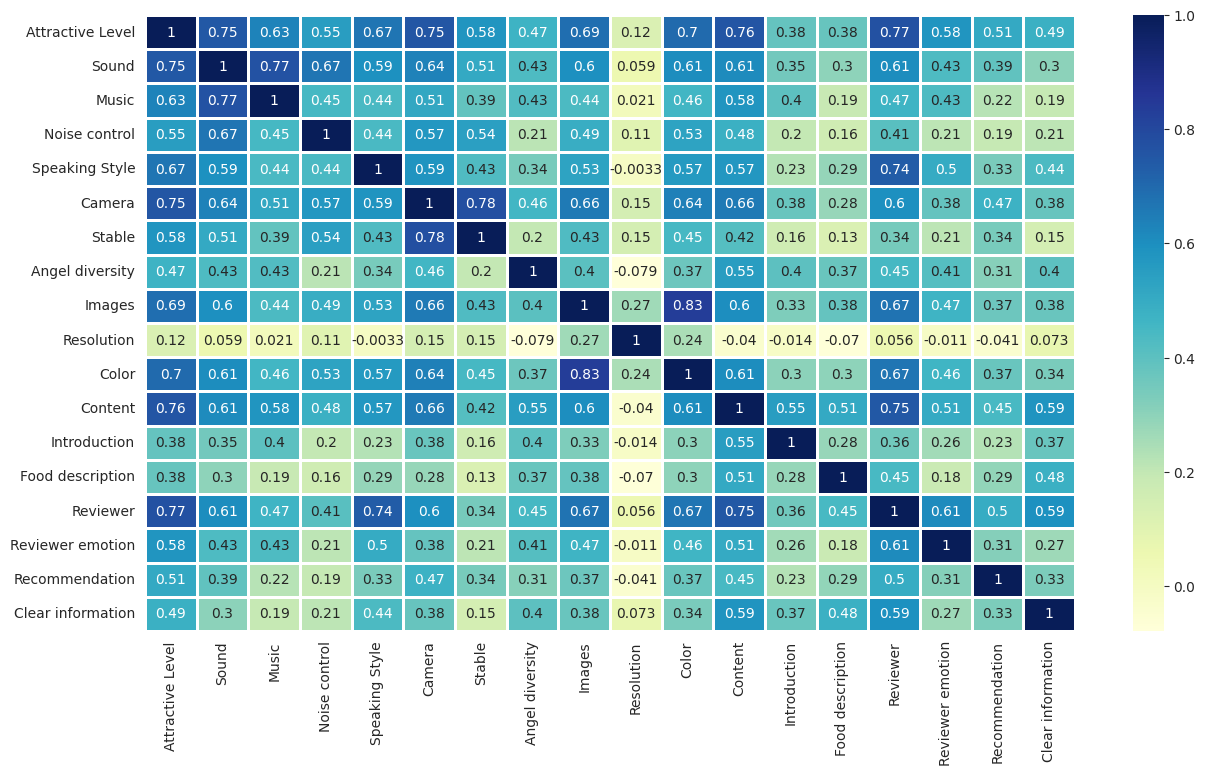

In [7]:
plt.figure(figsize = (15, 8))
dataplot = sb.heatmap(data.corr(),annot = True,linewidths=1, cmap='YlGnBu')
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=10)
plt.show()

# Split dataset into train_set and test_set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((101, 17), (34, 17))

# Train model

In [9]:
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X_train, y_train)
coef = regr.coef_

In [10]:
coef

array([[ 0.28038822,  0.00911074, -0.00608278,  0.02910798,  0.22421551,
        -0.00799954,  0.00141976,  0.17361708, -0.14425236, -0.02740787,
         0.2620382 , -0.4798222 , -0.06906421,  0.05373332,  0.18619592,
         0.15132344,  0.35503826]])

# Set of predicted data

In [11]:
y_predicted = [np.double(np.dot(coef, np.array([x]).T)) for x in X_test]

In [12]:
y_predicted

[3.786512269195175,
 2.4889130576613487,
 2.422587426704969,
 4.452433691866295,
 3.0364449939548828,
 2.9162371025015816,
 2.749634699708938,
 2.523488385220484,
 4.598501820857283,
 3.389122091449735,
 3.898242537595606,
 1.2951199835841438,
 2.111103456896608,
 3.0472879493769063,
 3.1502877611774642,
 2.442445256611724,
 3.429361640415373,
 4.053691904438003,
 2.5671170204652443,
 1.9369222554092829,
 2.736092685491774,
 4.894077618967788,
 3.5719201895969244,
 4.166307037552748,
 4.6381221993077,
 4.014071525987587,
 4.884966876780951,
 3.742161977236477,
 2.8093947300080204,
 2.725540577040765,
 4.3486232403169085,
 3.7074501885601223,
 4.259518074163981,
 3.8972920265049855]

# Error and accuracy

In [13]:
print("Accuracy: ", accuracy_score(y_test, np.round(y_predicted)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_predicted))
print("Mean Squared Error:", mean_squared_error(y_test, y_predicted))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_predicted)))

Accuracy:  0.6764705882352942
Mean Absolute Error: 0.4648272482867921
Mean Squared Error: 0.3773117807282973
Root Mean Squared Error: 0.6142570966039361


# Visualize data

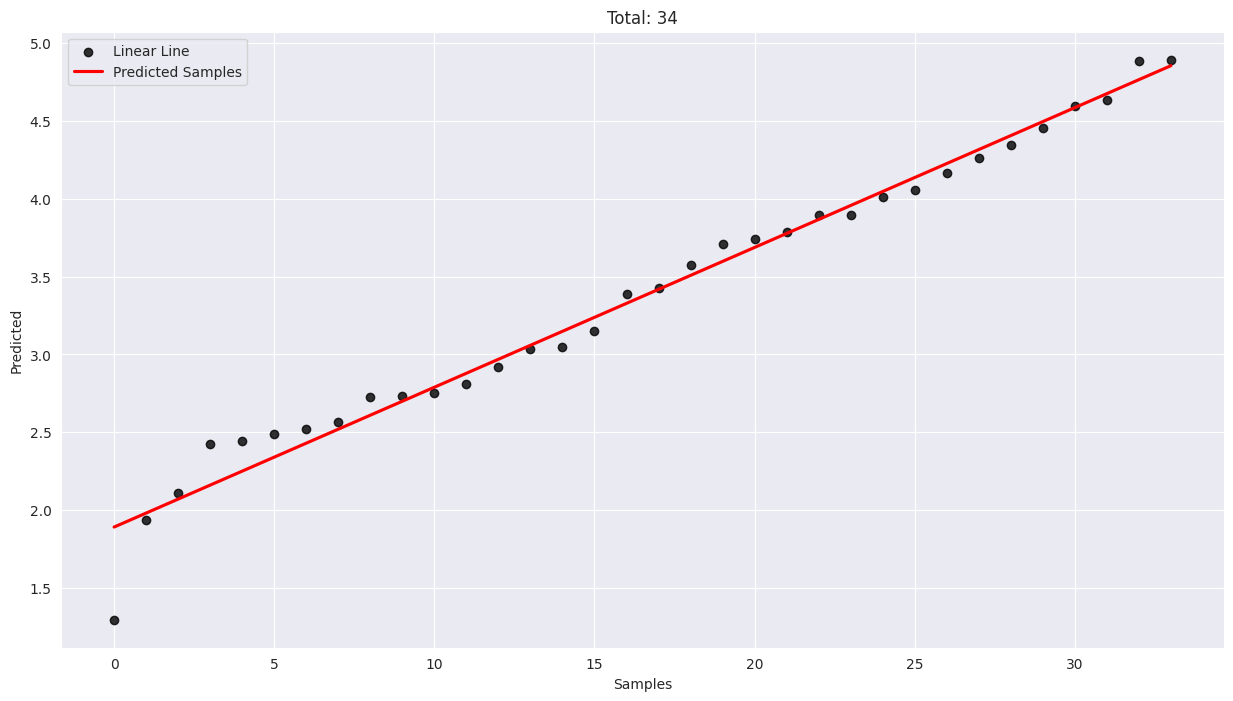

In [14]:
plt.figure(figsize=(15, 8))
plt.title(f"Total: {len(y_predicted)}")
plt.xlabel("Samples")
plt.ylabel("Predicted")

y_predicted.sort()
sb.regplot(x=[i for i in range(len(y_predicted))], y=y_predicted, data=data, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

plt.legend(['Linear Line', "Predicted Samples"])
plt.show()